c:\Users\co279\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.5888017593863986
MAE: 0.44714896113824093
MAPE: 0.11910424446453749
R2: 0.7933247853736223
      Actual  Predicted
3151    7.40   7.082475
3152    5.06   4.737585
3153    3.22   3.268450
3154    3.63   4.192535
3155    7.04   6.944894
...      ...        ...
3589    3.81   3.668586
3590    5.72   5.889545
3591    5.81   5.072844
3592    9.00   8.172522
3593    4.84   4.714785

[443 rows x 2 columns]
               Feature  Importance
4          slg_percent    0.579730
5      on_base_percent    0.159749
8               p_loss    0.019811
7                p_win    0.013949
3           bb_percent    0.013425
9      p_quality_start    0.013234
15    flyballs_percent    0.013206
18  fastball_avg_speed    0.012532
23  offspeed_avg_speed    0.011627
16  linedrives_percent    0.011208
24   offspeed_avg_spin    0.011089
10              p_hold    0.011015
1               p_game    0.010683
17      popups_percent    0.010612
6               p_save    0.010517
11     in_zone_percent    0.0

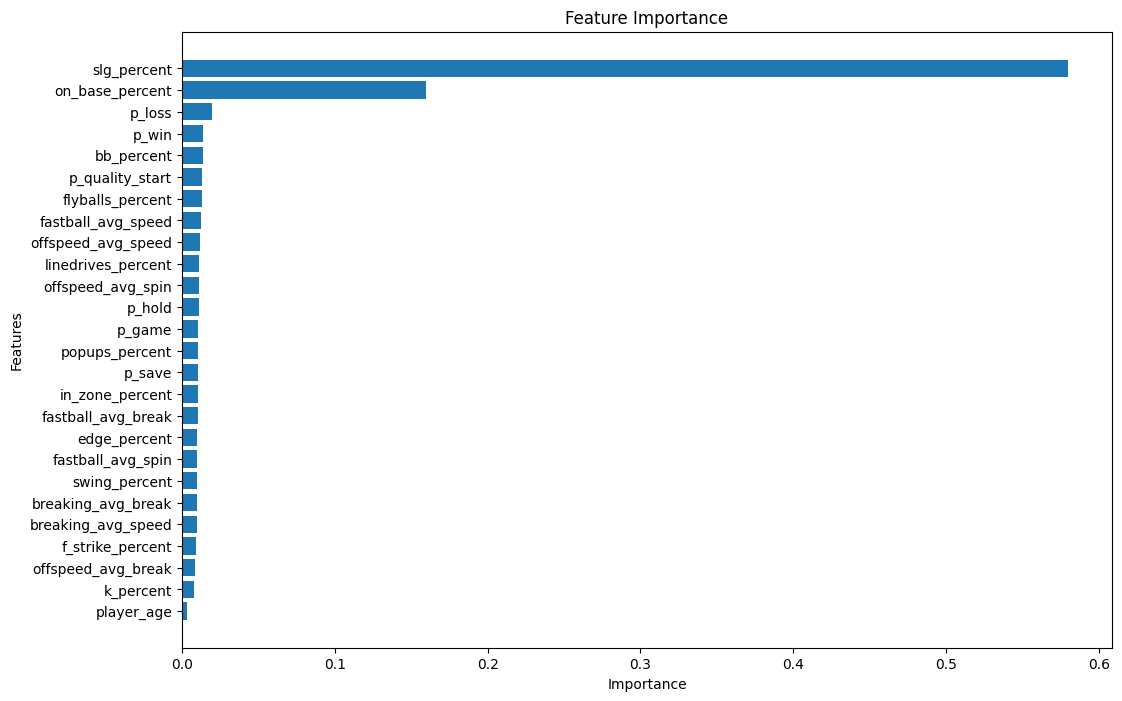

In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 데이터셋 불러오기
file_path = 'C:\\Users\\co279\\mp1.csv'
data = pd.read_csv(file_path)

# 필요 없는 컬럼 제거
data = data.drop(columns=['last_name, first_name', 'player_id'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(0)

# 모든 데이터가 숫자형인지 확인하고, 필요 시 변환
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)

# 학습 데이터와 테스트 데이터 분리
train_data = data[data['year'] != 2023]
test_data = data[data['year'] == 2023]

# 독립변수와 종속변수 분리
X_train = train_data.drop(columns=['p_era', 'year'])
y_train = train_data['p_era']
X_test = test_data.drop(columns=['p_era', 'year'])
y_test = test_data['p_era']

# 모델 정의
model = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)

# 모델 학습
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# 예측
y_pred = model.predict(X_test)

# RMSE 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")

# R2 계산
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

# 실제 값과 예측 값 비교
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# 비교 결과 출력
print(comparison)

feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()